In [75]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [65]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent(part1, part2):
    values = set(part1)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 and num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (len(values)*2 - 2)
            

In [66]:
def adjacent_nodes(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [6]:
with open("enums/enum_[3,3]_[3]_3_rc.txt") as file:
    nodes={}
    for i, line in enumerate(file):
        nodes[i] = np.fromstring(line, dtype=int, sep=',')
    

In [7]:
nodes

{0: array([1, 2, 2, 1, 2, 3, 1, 3, 3]),
 1: array([1, 2, 3, 1, 2, 3, 1, 2, 3]),
 2: array([1, 2, 2, 1, 3, 2, 1, 3, 3]),
 3: array([1, 2, 2, 1, 1, 2, 3, 3, 3]),
 4: array([1, 1, 2, 1, 2, 2, 3, 3, 3]),
 5: array([1, 1, 2, 1, 3, 2, 3, 3, 2]),
 6: array([1, 1, 1, 2, 3, 3, 2, 2, 3]),
 7: array([1, 1, 1, 2, 2, 3, 2, 3, 3]),
 8: array([1, 1, 1, 2, 2, 2, 3, 3, 3]),
 9: array([1, 1, 2, 3, 1, 2, 3, 3, 2])}

In [69]:
adjacent_nodes(nodes)

[(0, 1),
 (0, 2),
 (0, 7),
 (1, 2),
 (1, 5),
 (1, 9),
 (2, 3),
 (3, 4),
 (3, 8),
 (4, 5),
 (4, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8)]

In [70]:
graph = nx.Graph()
graph.add_edges_from(adjacent_nodes(nodes))

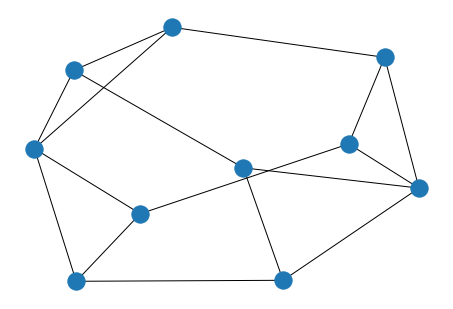

In [76]:
nx.draw(graph)
plt.show()

In [88]:
degrees = list(map(lambda n: nx.degree(graph,n), graph.nodes()))

In [90]:
print("Max Degree:", max(degrees))
print("Mim Degree:", min(degrees))

Max Degree: 4
Mim Degree: 3


In [91]:
nx.radius(graph)

3

In [92]:
nx.diameter(graph)

3

In [93]:
with open("enums/enum_[4,4]_[4]_4_rc.txt") as file:
    nodes_4_4={}
    for i, line in enumerate(file):
        nodes_4_4[i] = np.fromstring(line, dtype=int, sep=',')
    

In [96]:
edges_4_4 = adjacent_nodes(nodes_4_4)

In [99]:
graph_4_4 = nx.Graph()
graph_4_4.add_edges_from(edges_4_4)

In [100]:
degrees_4_4 = list(map(lambda n: nx.degree(graph_4_4,n), graph_4_4.nodes()))

In [101]:
print("Max Degree:", max(degrees_4_4))
print("Mim Degree:", min(degrees_4_4))

Max Degree: 8
Mim Degree: 3


In [102]:
nx.diameter(graph_4_4)

8